<span style="font-size: 30px;">Importing the Libraries & Loading data .</span>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

In [47]:
mydata=pd.read_csv("/home/mohit/Downloads/Data/Unemployment_Rate_2020.csv")
mydata
#mydata.info()



,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


<span style="font-size: 30px;">Exploring the Dataset.</span>

In [50]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region                                   267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
 9   Month_no.                                26

In [51]:
import datetime as dt

#Changing dd/mm/yyyy format to yyyy/mm/dd format
mydata['Date'] = pd.to_datetime(mydata['Date'], dayfirst=True)
#mydata['Date']

# Extracting month from 'Date ' column and creating a 'Month' column
mydata['Month_no.'] = mydata['Date'].dt.month.apply(lambda x: int(x))
#mydata['Month_no.']

# Mapping integer month values to abbreviated month names
mydata['Month_name'] = mydata['Month_no.'].apply(lambda x: calendar.month_abbr[x])
#mydata['Month_name']
mydata

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude,Month_no.,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,May
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep


In [52]:
#shows statical details of  data

mydata_stat = mydata[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
(round(mydata_stat.describe().T, 2))



,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate (%),267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [53]:
#Region wise Statical details of Data

region_stats = mydata.groupby(['Region'])[['Estimated Unemployment Rate (%)', 'Estimated Employed', 
                                       'Estimated Labour Participation Rate (%)']].mean().reset_index()
round(region_stats, 2).T

,0,1,2,3,4
Region,East,North,Northeast,South,West
Estimated Unemployment Rate (%),13.92,15.89,10.95,10.45,8.24
Estimated Employed,19602366.9,13072487.92,3617105.53,14040589.33,18623512.72
Estimated Labour Participation Rate (%),40.11,38.7,52.06,40.44,41.26


<span style="font-size: 30px;">Visualizing the Dataset.</span>

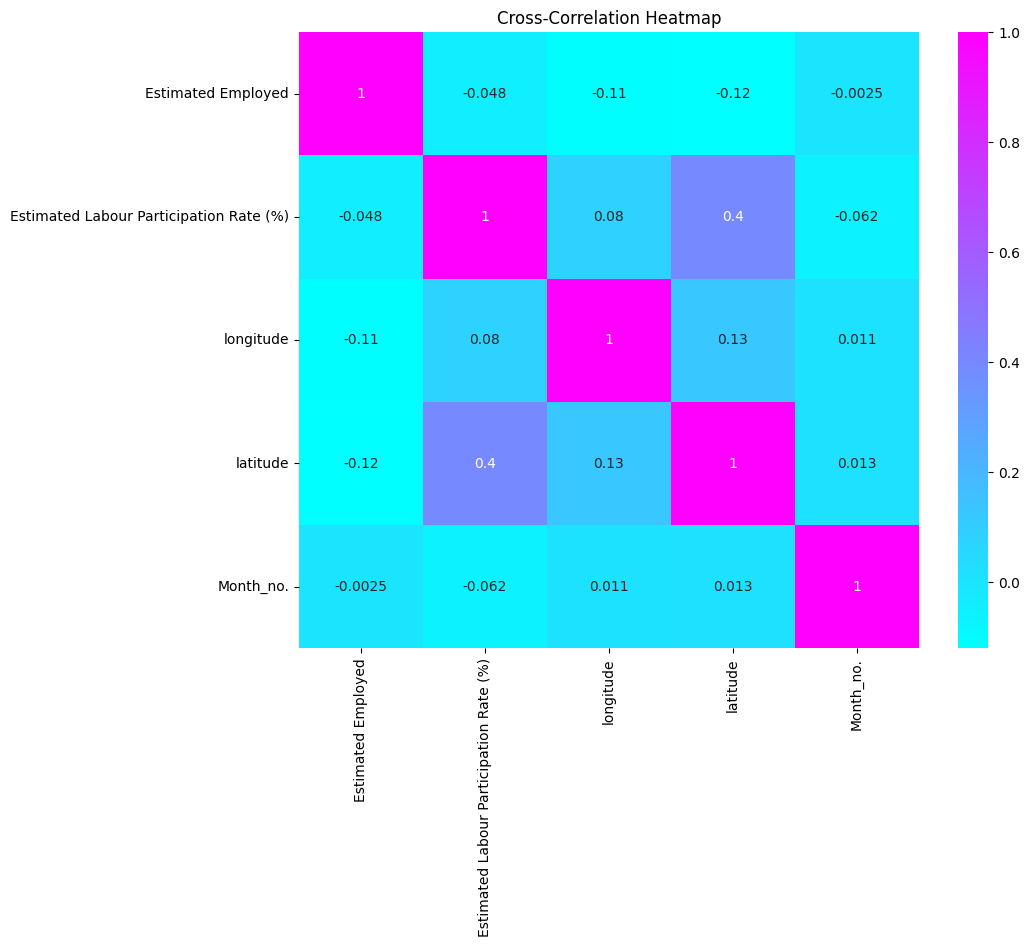

In [55]:
#Cross-correlation Matrix
correlation_matrix = mydata[mydata.select_dtypes(include=['int64','float64']).columns[1:]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title("Cross-Correlation Heatmap")
plt.show()

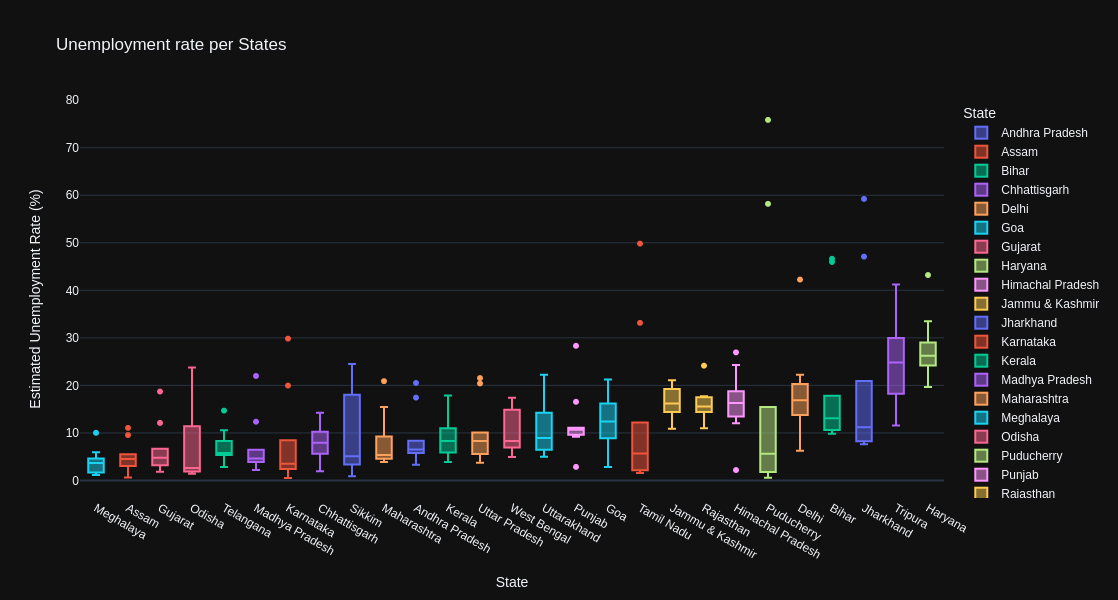

In [56]:
#plt.figure(figsize=(20, 15))
fig = px.box(mydata, x='State', y='Estimated Unemployment Rate (%)', color='State', title='Unemployment rate per States',width=1000, height=600, template='plotly_dark')

# Updating the x-axis category order to be in ascending total
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()

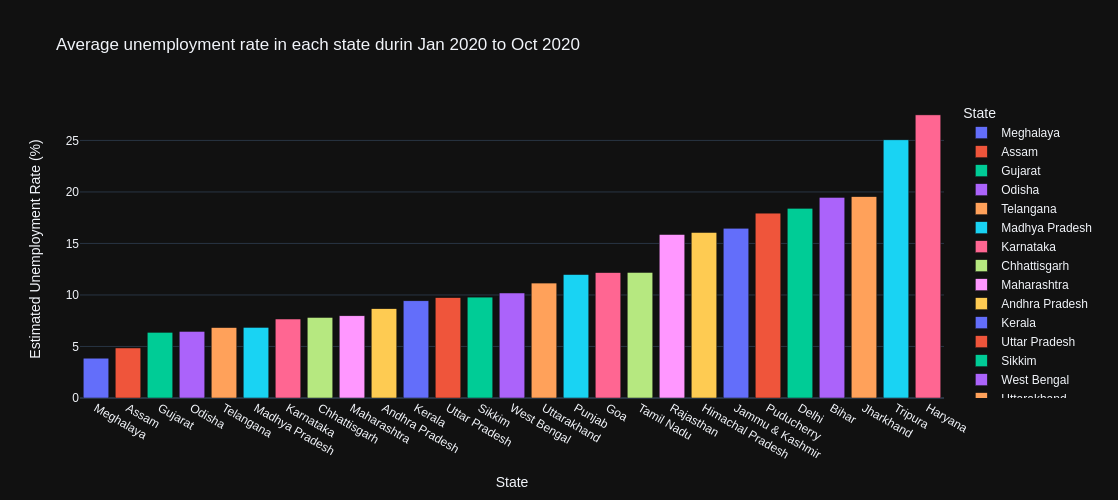

In [57]:
EUR_S = mydata[['Estimated Unemployment Rate (%)','State']]
unemployed_rate = EUR_S.groupby('State').mean().reset_index()

#sorting in ascending order
unemployed_rate = unemployed_rate.sort_values('Estimated Unemployment Rate (%)')
#unemployed_rate

fig = px.bar(unemployed_rate, x='State',y='Estimated Unemployment Rate (%)',color = 'State',title = 'Average unemployment rate in each state durin Jan 2020 to Oct 2020',width=1000, height=500,template='plotly_dark')
fig.show()



In [58]:
lock = mydata[(mydata['Month_no.'] >= 4)] 
pre_lock = mydata[(mydata['Month_no.'] >= 1) & (mydata['Month_no.'] <=3)]

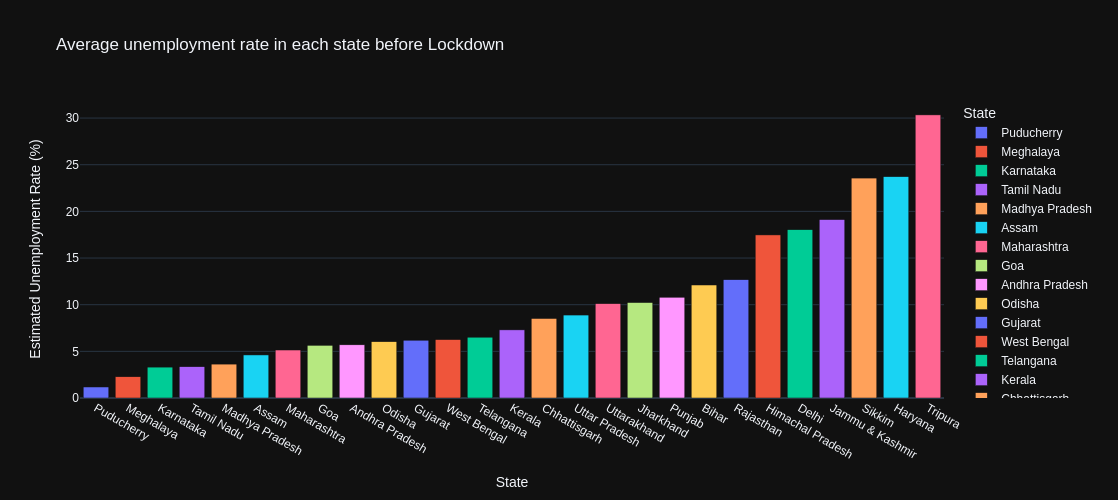

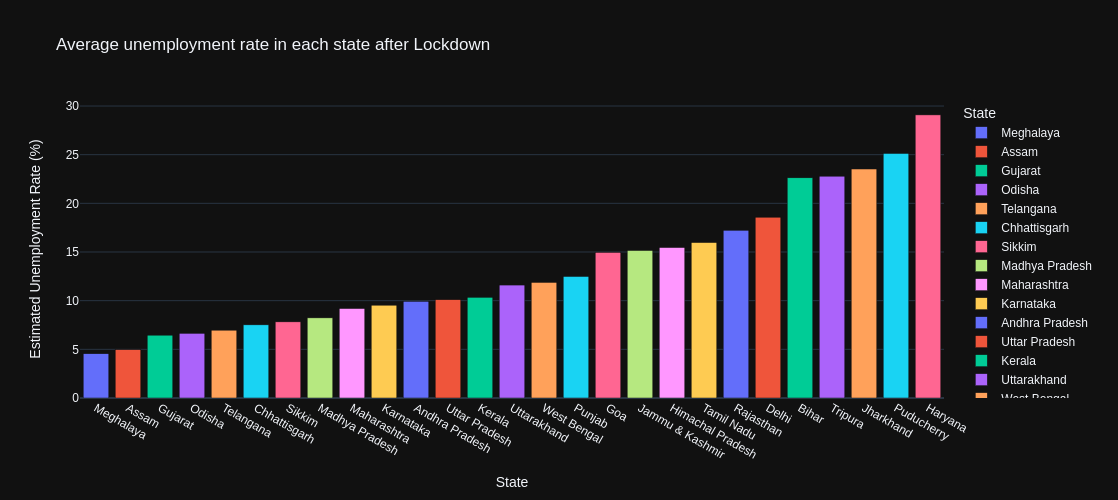

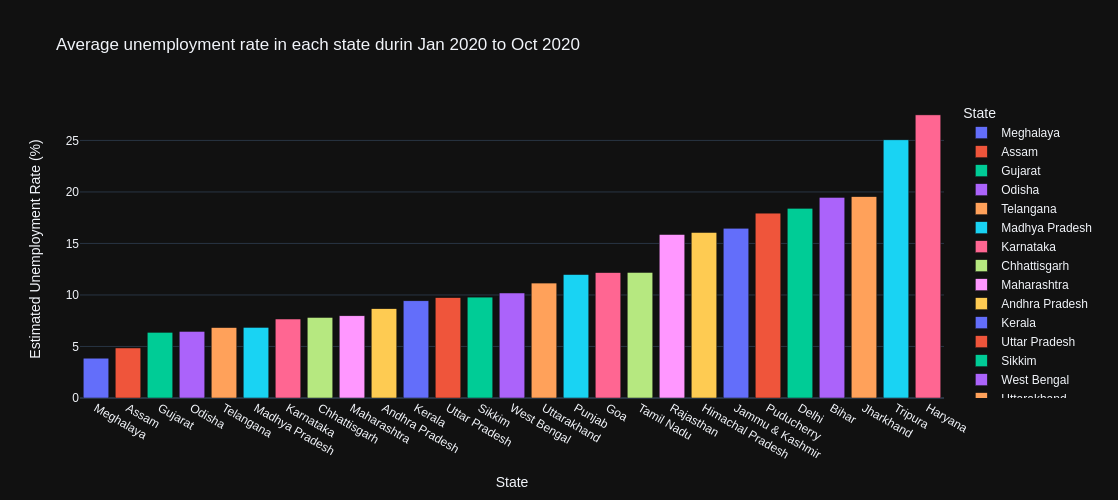

In [59]:

#Plot for PRE LOCKDOWN
EUR_PL = pre_lock[['Estimated Unemployment Rate (%)','State']]
unemployed_rate_PL = EUR_PL.groupby('State').mean().reset_index()

#sorting in ascending order
unemployed_rate_PL = unemployed_rate_PL.sort_values('Estimated Unemployment Rate (%)')
#unemployed_rate

fig = px.bar(unemployed_rate_PL, x='State',y='Estimated Unemployment Rate (%)',color = 'State',title = 'Average unemployment rate in each state before Lockdown',width=1000, height=500,template='plotly_dark')
fig.show()


#plot after LOCKDOWN
EUR_L = lock[['Estimated Unemployment Rate (%)','State']]
unemployed_rate_L = EUR_L.groupby('State').mean().reset_index()

#sorting in ascending order
unemployed_rate_L = unemployed_rate_L.sort_values('Estimated Unemployment Rate (%)')
#unemployed_rate

fig = px.bar(unemployed_rate_L, x='State',y='Estimated Unemployment Rate (%)',color = 'State',title = 'Average unemployment rate in each state after Lockdown',width=1000, height=500,template='plotly_dark')
fig.show()


#Plot during Jan. 20220 to Oct. 2020
EUR = mydata[['Estimated Unemployment Rate (%)','State']]
unemployed_rate = EUR.groupby('State').mean().reset_index()

#sorting in ascending order
unemployed_rate = unemployed_rate.sort_values('Estimated Unemployment Rate (%)')
#unemployed_rate

fig = px.bar(unemployed_rate, x='State',y='Estimated Unemployment Rate (%)',color = 'State',title = 'Average unemployment rate in each state durin Jan 2020 to Oct 2020',width=1000, height=500,template='plotly_dark')
fig.show()

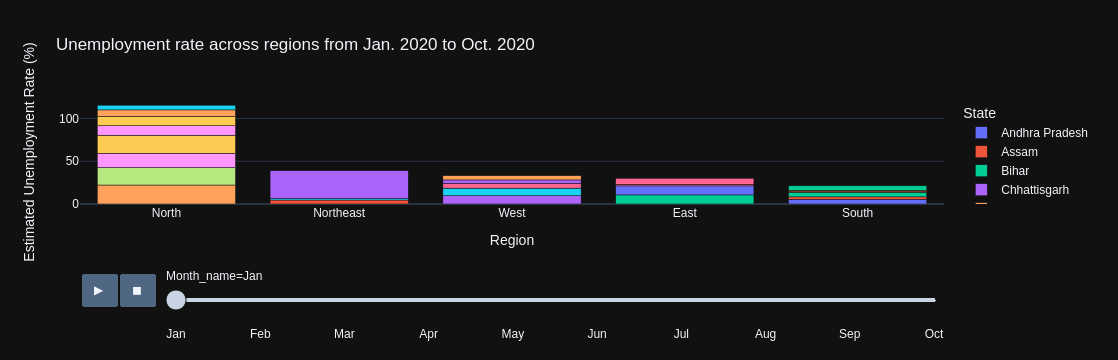

In [60]:
fig = px.bar(mydata, x='Region', y='Estimated Unemployment Rate (%)', animation_frame='Month_name', color='State',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=800, template='plotly_dark')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()


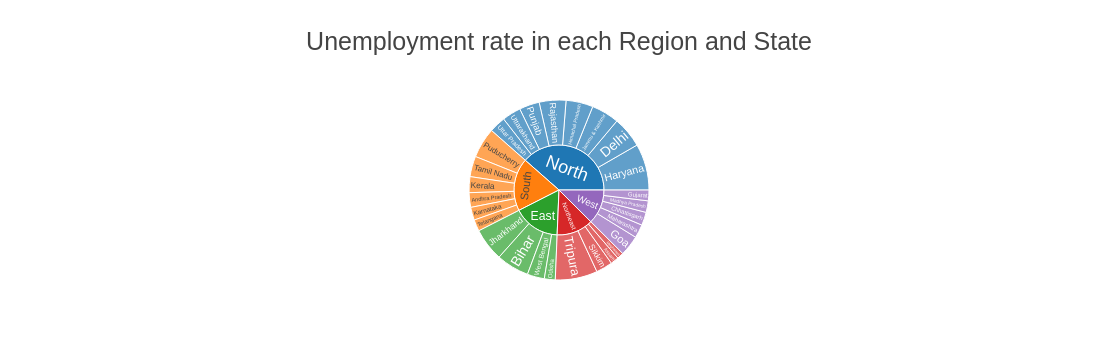

In [61]:

# Creating a DataFrame with relevant columns
unemployed = mydata[['State', 'Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]

unemployed = unemployed.groupby(['Region', 'State'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Creating a Sunburst chart 
fig = px.sunburst(unemployed, path=['Region', 'State'], values='Estimated Unemployment Rate (%)', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=750, template='presentation')

fig.show()


In [62]:
#Sorting States Alphabetically
unemployed_rate_sorted = unemployed_rate.sort_values('State')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
unemployed_rate_sorted.rename(columns = {'Estimated Unemployment Rate (%)':'Mean Estimated Unemployment Rate (%)'}, inplace = True) 
unemployed_rate_sorted

,State,Mean Estimated Unemployment Rate (%)
0,Andhra Pradesh,8.664000
1,Assam,4.856000
2,Bihar,19.471000
3,Chhattisgarh,7.819000
4,Delhi,18.414000
5,Goa,12.167000
6,Gujarat,6.376000
7,Haryana,27.477000
8,Himachal Pradesh,16.065000
9,Jammu & Kashmir,16.477778


In [63]:
import geopandas as gpd

#Reading the shape file of Indian map with states boundaries
map_data = gpd.read_file('/home/mohit/Downloads/mygeodata/indiamap2-polygon.shp') 

#map_data.plot()

map_data['State']=unemployed_rate_sorted['State']
map_data['Mean Estimated Unemployment Rate (%)']=unemployed_rate_sorted['Mean Estimated Unemployment Rate (%)']
map_data = map_data.drop(columns=['id'])

#we do not have data of following states and union territories data
#Andaman and Nicobar Islands, Lakshadweep, Manipur, Mizoram, Ladakh, Dadra and Nagar Haveli, Daman and Diu, Arunachal Pradesh, Nagaland, Manipur
#so I am adding 0 in Estimated Unemployment Rate (%) columns for those states 
for i in range(27,37):
    map_data.iloc[[i],[3]] = 0   #replacing Nan to 0 for unavailabe state data
    map_data.iloc[[i],[2]] = map_data['st_nm'][i] #adding missing states and union territories name
    
#This Shape file Draw Jammu => Jammu and Kashmir  and Kashmir => Ladakh
#so I am adding Estimated Unemployment Rate (%) for Ladakh = value for Jammu and Kashmir
map_data.iloc[[31],[3]]=16.477778
map_data

,st_nm,geometry,State,Mean Estimated Unemployment Rate (%)
0,Andhra Pradesh,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",Andhra Pradesh,8.664000
1,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",Assam,4.856000
2,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",Bihar,19.471000
3,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",Chhattisgarh,7.819000
4,Delhi,"POLYGON ((77.19755 28.86191, 77.33703 28.67912...",Delhi,18.414000
5,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",Goa,12.167000
6,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...",Gujarat,6.376000
7,Haryana,"POLYGON ((77.12555 30.56374, 77.21329 30.50281...",Haryana,27.477000
8,Himachal Pradesh,"POLYGON ((78.92089 31.25498, 79.01313 31.11211...",Himachal Pradesh,16.065000
9,Jammu and Kashmir,"POLYGON ((74.09957 35.14187, 74.52028 35.10615...",Jammu & Kashmir,16.477778


<AxesSubplot:title={'center':'Average Unemployment Rate (%) during Jan. 2020 to Oct. 2020'}>

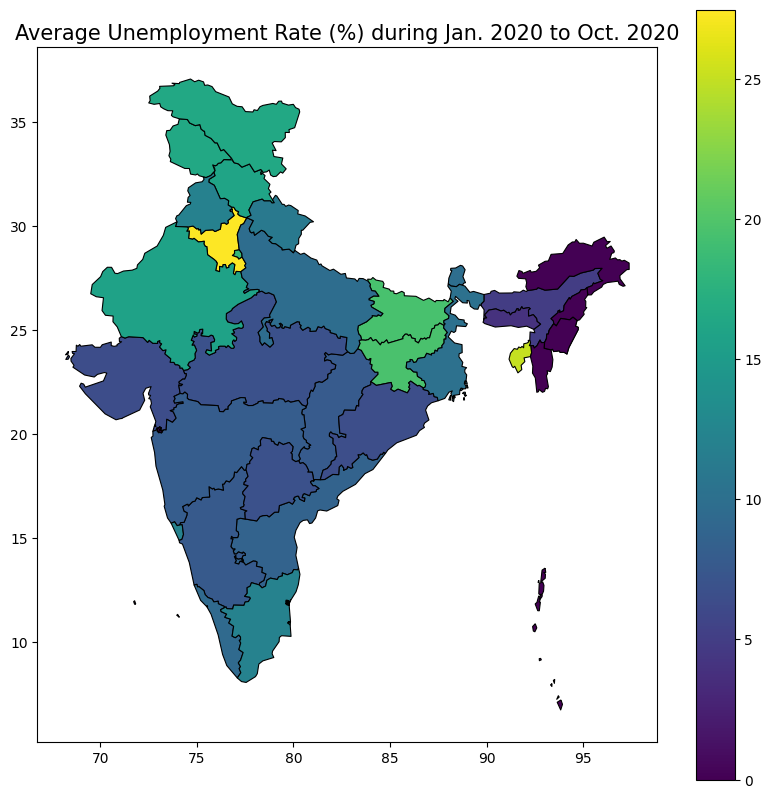

In [64]:
import matplotlib.cm
#cmap = matplotlib.cm.get_cmap('Reds')
fig, ax = plt.subplots(1, figsize=(10, 10))
#ax.axis('off')
ax.set_title('Average Unemployment Rate (%) during Jan. 2020 to Oct. 2020', fontdict={'fontsize': '15', 'fontweight' : '10'})

# plot the figure
map_data.plot(column='Mean Estimated Unemployment Rate (%)',cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])